
# Introduction to Image Processing

## Getting Ready

Most of the software typically used for image processing, like *scipy*, *scikit-image*, *PIL*,  already comes installed with the major Python distributions.

*[OpenCV](http://www.opencv.org/)*, however, (which is a terrific program but not necessaritly required for this Notebook) often has to be installed by hand:

- On Windows machines, it is best to download the corresponding compiled *OpenCV*-package from [Christoph Gohlke](http://www.lfd.uci.edu/~gohlke/pythonlibs/) to your machine, and install it with *pip install [package]*.
- On Linux machines (and also on OSC) you should use *Anaconda*, and install *OpenCV* with

    conda install -c menpo opencv3


**Note:** the *OpenCV*-version of Christoph Gohlke does not contain all modules. Especially, the module [bioinspired](http://docs.opencv.org/3.0-beta/modules/bioinspired/doc/bioinspired.html) - which is a simulation of the retina - is not included. The easiest way to get this one to run on a Windows machine is to use *Anaconda*, and install *OpenCV* as described above.

## Data Representation

Images are typically not represented as 64-bit float numbers. Instead, to save space, typically 8-bit unsigned integers are used, giving us 256 gray-levels. However, watch out when working with unsigned integers:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Watch out for overflow when working with unsigned integers!!
x = np.arange(10, dtype=np.uint8)
print(x+250)

[250 251 252 253 254 255   0   1   2   3]


### Where is up?

<img src="data\images\WhichWayUp.png" style="width: 600px;" align="left"/>

We are used to representing 2d maps with x/y coordinates, the first denoting horixontal, from left to right, and the second denoting vertical, from down to up.

However, when we index matrices, the first index denotes the rows, from top to bottom; and the second index the columns, from left to right:

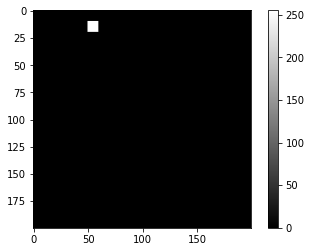

In [3]:
data = np.zeros((200,200), dtype=np.uint8)
data[10:20, 50:60]=255
plt.imshow(data)
plt.colorbar()
plt.gray()

#### Challenging orientations when using "ginput"

In [4]:
# Depending on where you started the notebook from, you may have to change directory here
# cd C:\Users\p20529\CloudStation\Teaching\CSS\Coding\CSS_ipynb

In [9]:
# Plot this into an external window, so that interactive selection is possible
# Depending on your system, you might have to type 
#%matplotlib qt5
%matplotlib

Using matplotlib backend: TkAgg


In [13]:
in_file = r'data\images\Waalensee.jpg'
img = plt.imread(in_file)
plt.imshow(img)
plt.title('Please click a point on the car')
selected = np.round(np.array(plt.ginput(1)))
print(f'The car has the x/y-coordinates {selected[0]}')
plt.close()

The car has the x/y-coordinates [181. 982.]


In [14]:
# Next, a copy of the image is made, and two squares are modified: 
# one to white, the other one to gray.
# Make sure you understand why the "gray" is in the lower left corner, and the
# "white" in the upper right one. They do NOT match the ginput-coordinates!
img_adjusted = img.copy()
img_adjusted[200:240, 980:1020] = 160 # gray
img_adjusted[980:1020, 200:240] = 255 # white

# Note: each x/ycoordinate has 3 components!
img_adjusted[0,0]

array([35, 61, 96], dtype=uint8)

In [15]:
# Back to inline images
%matplotlib inline

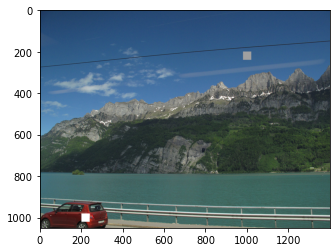

In [16]:
plt.imshow(img_adjusted)
plt.show()

### Color representations

#### With Colormaps

plt.gray() sets the colormap to "gray". Type help(plt.colormaps) and CTRL+ENTER for more information.

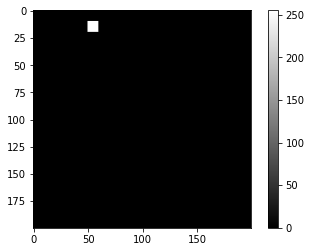

In [17]:
plt.gray()
plt.imshow(data)
plt.colorbar()
# in Matlab: imagesc()

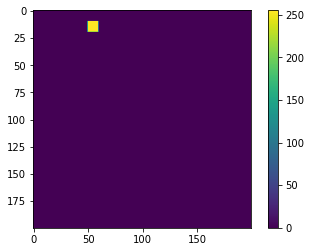

In [18]:
plt.viridis()
plt.imshow(data)
plt.colorbar()

#### As RGB (Red-Green-Blue)
Images which are represented in full color require a *red*, *green*, and *blue* (=RGB) channel, stacked up in a 3D-array:

(200, 200, 3)

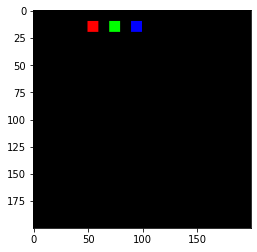

In [19]:
data_c = np.zeros((200,200,3), dtype=np.uint8)
data_c[10:20, 50:60, 0] = 255
data_c[10:20, 70:80, 1] = 255
data_c[10:20, 90:100, 2] = 255
plt.imshow(data_c)
data_c.shape

## Simple Image Manipulations

$R = \sqrt{x^2 + y^2}$

Note that you can use boolean expressions to address areas with specific properties in the image.

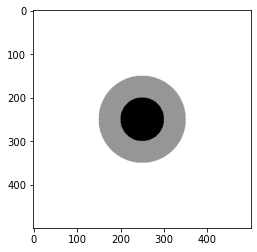

In [20]:
myrange = np.arange(-250,250)
X,Y = np.meshgrid(myrange, myrange)
Z = np.zeros(X.shape)

# Iris & pupil
R = np.sqrt(X**2+Y**2)   # in Matlab: replace "**" with ".^"
Z[R>50]=150
Z[R>100] = 255
plt.gray()
plt.imshow(Z)

The only tricky thing in the next step: I use "int32" to convert the result to integer (we can only set individual points), and use "250+..." to shift things into th middle of our plot.

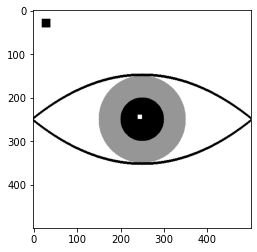

In [21]:
# Eyelids
polyPars = np.polyfit([-250, 0, 250], [0, 100, 0], 2)
x = np.arange(-250,250)
y = np.int32(np.polyval(polyPars, x))

lidThickness = 6
for ii in range(lidThickness):
    Z[ 250 + y+ii, 250 + x] = 1
    Z[ 250 - y-ii, 250 + x] = 1

# Add a few beauty spots
Z[20:40, 20:40] = 0
Z[240:250, 240:250] = 255
plt.imshow(Z)

### Saving a Figure

We can save the figure to PNG, JPEG, and other formats.

**Warning:** compressed image formats, e.g. JPEG, discard information by throwing away image details. Therefore they are not recommended for storing processed image data.

In [22]:
# Save the figure
print('Z has the shape {0}'.format(Z.shape))
outFile = 'test.png'
plt.imsave(outFile, Z)

Z has the shape (500, 500)


### Loading a Color Image

In [23]:
# Load the data again
# The 4th channel is used to indicate the alpha-transparency.

data = plt.imread(outFile)
print('"data" has the shape {0}'.format(data.shape))

"data" has the shape (500, 500, 4)


In [24]:
%matplotlib inline

## Data Filtering

For working with images, a number of different resources exist:

- [ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html): SciPy functions for n-dimensional image processing
- [PIL](http://pillow.readthedocs.org/en/latest/index.html): the Python Image Library (now developed under the name "Pillow"). simple routines to manipulate images: resize, color conversions, simple filtering. Object oriented.
- [scikit-image](http://scikit-image.org/): a very "pythonic" collection of algorithms for image processing
- [opencv](http://opencv.org/): an open source image processing library written in C/C++, and designed for computational efficiency and with a strong focus on real-time applications.

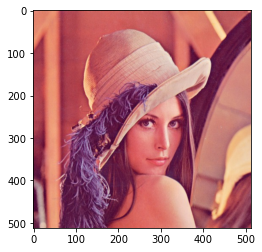

In [25]:
inFile = r'data\images\lena.jpg'
img = plt.imread(inFile)

# If you want the politically correct image,use
#from skimage.data import astronaut
#img = astronaut()
plt.imshow(img)
plt.show()

### Conversiont to Grayscale

When we apply a linear filter to a 2D image, we have to specify on which colorplane it is supposed to act. So the first step is often to convert an image to grayscale.

#### By Hand ...

One way to do this is by hand, using values that correspond to natural human vision. (Remember, we have more green than red receptors in the retina, and more red receptors than blue ones.)

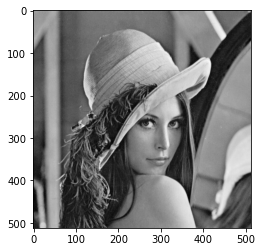

In [26]:
img_g = img.dot([0.2125, 0.7154, 0.0721]).astype(np.uint8)
plt.imshow(img_g)
plt.gray()

#### ... or by using scikit-image (skimage) ...
The same conversion can be performed with the package *scikit-image*, which - for brevity - is accessible as *skimage*:

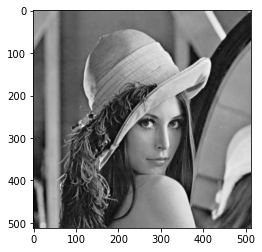

In [27]:
from skimage import color
img_g_float = color.rgb2gray(img)
plt.imshow(img_g_float)

#### ..., by using the Python Image Library ("pillow" or "PIL")
A comment on the different merits of *scikit-image* vs. *PIL* from [stackoverflow](https://stackoverflow.com/questions/43723214/pil-image-vs-skimage-io-when-to-use-each-and-which-if-one-is-prefered-over-t):

*"skimage and skvideo are stronger for machine learning and algorithmic type of work in which you need to access the image's internal array structure. PIL is more of a high level image library."*

Note that the gray-converted image from PIL is `uint8`, while the output from skimage is `float`

<class 'numpy.ndarray'>
<PIL.Image.Image image mode=L size=512x512 at 0x1EA7506A730>


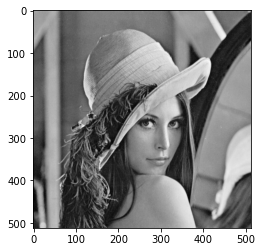

In [28]:
import PIL
pil_img = PIL.Image.fromarray(img)
pil_g = pil_img.convert('L')
plt.imshow(pil_g)

# Note the data-types: PIL provides a PIL-image!
print(type(img))
print(pil_g)

In [29]:
print(img_g.dtype)   # from PIL
print(img_g_float.dtype)  # from skimage

uint8
float64


### Linear Filters - I: blurring

An [introduction to image filtereing is given in the wikibook on Sensory Systems](https://en.wikibooks.org/wiki/Sensory_Systems/Computer_Models/Descriptive_Simulations_of_Visual_Information_Processing#2D_Filter).

For the manual application of linear filters, one can use *convolutions*:
http://stackoverflow.com/questions/16121269/2d-convolution-in-python-similar-to-matlabs-conv2

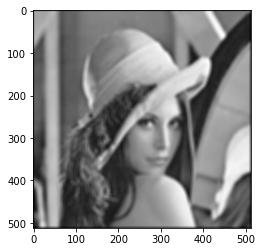

In [30]:
from scipy import ndimage

# Blur by averaging over a 10x10 "structural element"
filter_matrix = np.ones((10,10))/100

# ndimage.convolve implements the 2D-filter
# The `mode` parameter determines how the input array is extended beyond its boundaries.
# And `cval` sets the value to fill past edges of input if `mode` is 'constant'.
img_filtered = ndimage.convolve(img_g_float, filter_matrix, mode='constant', cval=0.0)
plt.imshow(img_filtered)

### Linear Filters - II: Edge Detection

#### By Hand, ...

In [31]:
type(pil_g)

PIL.Image.Image

[[462 616 615 612 609]
 [  2   0  -3  -4  -3]
 [  3   3   1   0   0]
 [  5   3  -2  -3   0]
 [  0  -2  -4  -2   2]
 [ -9 -11  -9  -7  -6]]
[[206 104 103 100  97]
 [  2   0 253 252 253]
 [  3   3   1   0   0]
 [  5   3 254 253   0]
 [  0 254 252 254   2]
 [247 245 247 249 250]]


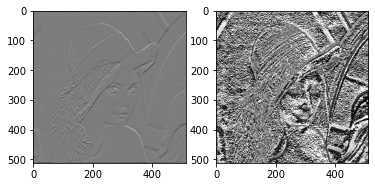

In [32]:
# since the last gray-image was in PIL-format, we first bring it back into
# array form
pil_g = np.array(pil_g)

# Here we use a filter for vertical edges
# The corresponding `Filter.T` detects horizontal edges
Filter = np.array([[1, 0, -1],
                [2, 0, -2],
                [1, 0, -1]])

from scipy import ndimage

# WATCH OUT! The image type is important for the result!

img_filtered_int = ndimage.convolve(np.int16(img_g), Filter.T, mode='constant', cval=0.0)
img_filtered_uint8 = ndimage.convolve(img_g, Filter.T, mode='constant', cval=0.0)
#print(np.uint8(img_g)[:5, :5])
print(img_filtered_int[:6, :5])
print(img_filtered_uint8[:6, :5])

'''
# If you want to handle negative numbers and overflows here, you have to do it by hand:
img_filtered_int[img_filtered_int<0] = 0
img_filtered_int[img_filtered_int>255] = 255
img_filtered_uint8 = np.uint8(img_filtered_int)
'''

fig, axs = plt.subplots(1,2)
axs[0].imshow(img_filtered_int)
axs[1].imshow(img_filtered_uint8)

In the example above you see that you have to **really** watch out when working with *unsigned integers*, since filtered uint8-images tend to include values *>255* and *<0*. 

In [33]:
Filter.dtype

dtype('int32')

[[153 460 616 618 616 612 610 612]
 [154 462 616 615 612 609 609 612]
 [  1   2   0  -3  -4  -3  -1   0]
 [  1   3   3   1   0   0   1   2]
 [  2   5   3  -2  -3   0   3   4]
 [  0   0  -2  -4  -2   2   4   1]
 [ -3  -9 -11  -9  -7  -6  -8 -13]
 [ -4 -13 -17 -15 -13 -12 -15 -18]]
---------
[[  3   0  -3  -4  -3  -1   0]
 [  3   0  -3  -4  -3  -1   0]
 [  4   3   1   0   0   1   2]
 [  7   3  -2  -3   0   3   4]
 [  0  -2  -4  -2   2   4   1]
 [-12 -11  -9  -7  -6  -8 -13]
 [-17 -17 -15 -13 -12 -15 -18]]


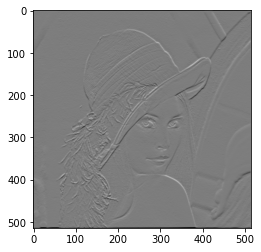

In [34]:
# Note that different functions handle the edge-areas different
# Also the type of the returned results can differ:
#  * signal.convolve2d returns the type of the filter
#  * ndimage.convolve returns the type of the image
# Apart from these differences, the results are the same.
    
from scipy import signal, ndimage

filtered = signal.convolve2d(img_g, Filter.T)
print(filtered[:8, :8])
plt.imshow(filtered)
print('---------')

# without type forcing, the result is uint8
filtered_b = ndimage.convolve(np.int32(img_g), Filter.T)
print(filtered_b[:7, :7])

#### ... or with scikit-image ...

This is a Python package dedicated to image processing.

http://scikit-image.org/

Note that scikit-image does not have an own 2d linear filter, since this already exists in scipy (see also http://stackoverflow.com/questions/23208232/image-filtering-with-scikit-image)

[[0.00294118 0.00415945 0.00219222 0.00620054]
 [0.00219222 0.00138648 0.00294118 0.00620054]
 [0.00277297 0.00219222 0.00353485 0.00554594]
 [0.00490196 0.00404226 0.00571662 0.00527957]]


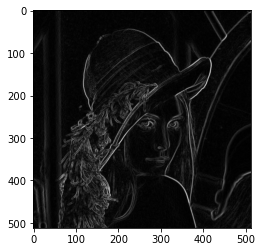

In [35]:
from skimage import filters
filtered = filters.sobel(img_g)
plt.imshow(filtered)
print(filtered[:4, :4])

#### ... or with openCV

[[ -0.  -0.  -0.  -0.  -0.  -0.  -0.]
 [  2.  -0.  -3.  -4.  -3.  -1.  -0.]
 [  4.   3.   1.  -0.  -0.   1.   2.]
 [  6.   3.  -2.  -3.  -0.   3.   4.]
 [ -0.  -2.  -4.  -2.   2.   4.   1.]
 [-12. -11.  -9.  -7.  -6.  -8. -13.]]


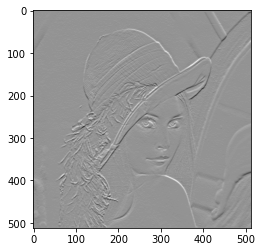

In [36]:
import cv2
filtered = -cv2.filter2D((img_g), cv2.CV_32F, Filter.T)
plt.imshow(filtered)
print(filtered[:6, :7])

### Nonlinear Filters & Speed Comparison

In the following, I compare "closing" functions from three different packages. "Closing" is a morphological operation, where you first "dilate" and then "erode" and image with a "structuring element". It can be used e.g. to eliminate the eyelids in the image. For more information on morphological operations, see e.g. https://en.wikipedia.org/wiki/Mathematical_morphology.

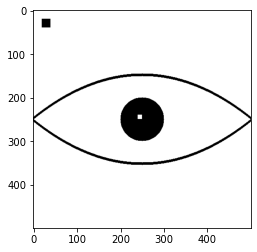

In [37]:
from scipy.ndimage.morphology import binary_closing
from skimage.morphology import closing, square

# To keep things simple, let us first generate a binary image
data = plt.imread(outFile)
bw = data[:,:,0]>0.5
bw_uint8 = np.uint8(bw*255)
plt.imshow(bw_uint8)

# Use a square with side-length 20 as "sturctural element"
strel = square(20)

In [38]:
print('Scikit Image:')
%timeit out = closing(bw, strel)

print('Scipy:')
%timeit out = binary_closing(bw, strel)

try:
    import cv2
    print('OpenCV:')
    %timeit out = cv2.morphologyEx(bw_uint8, cv2.MORPH_CLOSE, strel)
except ImportError:
    print('Sorry, could not run OpenCV!')

Scikit Image:
161 ms ± 471 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Scipy:
49.9 ms ± 491 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
OpenCV:
295 µs ± 672 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


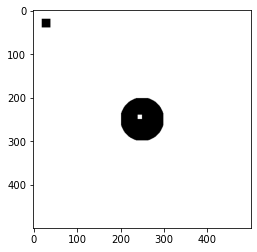

In [39]:
# Just to show you what it looks like:
out = closing(bw_uint8, strel)
plt.imshow(out)

<img src="data\images\Forward.png" align='left'> [ImgProc_2_Filtering](ImgProc_2_Filtering.ipynb)


    Author: Thomas Haslwanter
    Date: May 16, 2021

<img src="data/images/CCA_40.png">
*Image Processing*  is licensed under a Creative Commons Attribution 4.0 International License.